# Linear Regression as a Neural Network
This notebook introduces linear regression as a simple neural network and demonstrates how it can be fitted using gradient descent. We'll go through: 
- Data generation
- Visualisation
- Defining the model
- Loss function
- Gradient Descent algorithm
- Fitting the model and plotting convergence
- Manual training loop in Python


In [1]:
import numpy as np
import matplotlib.pyplot as plt


## Generate a simple dataset

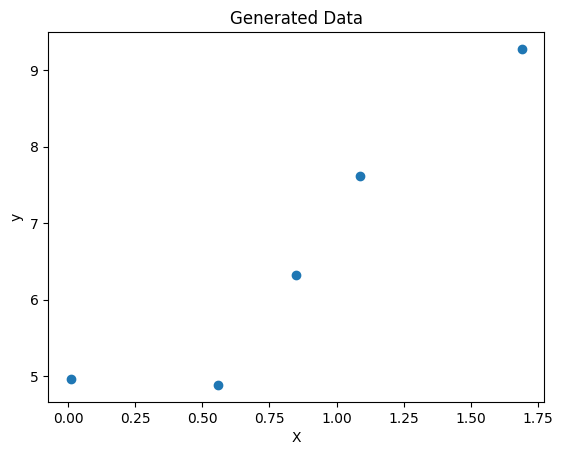

X: [1.09 0.56 0.85 1.69 0.01]
y: [7.62 4.88 6.32 9.28 4.96]


In [10]:
np.random.seed(100)
X = 2 * np.random.rand(5, 1)
y = 4 + 3 * X + np.random.randn(5, 1)
plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Generated Data')
plt.show()
print("X:", np.round(X.flatten(), 2))
print("y:", np.round(y.flatten(), 2))

We want to use the equation: y = a + b * x + e
We will choose some values of a and b and look at the values of the residual sum of squares

In [14]:
a = 1
b = 1
sum_of_squares = np.sum((y - (a + b * X)) ** 2)
print(f"Residual sum of squares for a={a}, b={b}: {sum_of_squares:.2f}")
a = 5
b = 0.5
sum_of_squares = np.sum((y - (a + b * X)) ** 2)
print(f"Residual sum of squares for a={a}, b={b}: {sum_of_squares:.2f}")


Residual sum of squares for a=1, b=1: 120.61
Residual sum of squares for a=5, b=0.5: 17.02


## Linear Model
We model the line as $y = wX + b$

In [ ]:
def predict(X, w, b):
    return w * X + b

## Loss Function: Mean Squared Error

In [ ]:
def mse(y_true, y_pred):
    return ((y_true - y_pred) ** 2).mean()

## Gradient Descent Step

In [ ]:
def compute_gradients(X, y, w, b):
    y_pred = predict(X, w, b)
    error = y_pred - y
    dw = (2 * (error * X).mean())
    db = (2 * error.mean())
    return dw, db

## Training the Model using Gradient Descent

In [ ]:
w, b = 0.0, 0.0
lr = 0.1
epochs = 100
losses = []

for epoch in range(epochs):
    dw, db = compute_gradients(X, y, w, b)
    w -= lr * dw
    b -= lr * db
    loss = mse(y, predict(X, w, b))
    losses.append(loss)

print(f'Trained weights: w = {w:.2f}, b = {b:.2f}')

## Plotting the Fit

In [ ]:
plt.scatter(X, y)
plt.plot(X, predict(X, w, b), color='red')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Fit after Training')
plt.show()

## Loss Curve

In [ ]:
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.show()

## Try it Yourself!
Try changing the learning rate or number of epochs and see how it affects convergence.